In [1]:
using JLD, PyPlot

In [56]:
archivo="../JLDFiles/TrabajandoCentrosdeMasa/LFP_Promedio_est_bic9.jld"
archivocm="../JLDFiles/TrabajandoCentrosdeMasa/LFP_Promedio_est_bic9-CM.jld"

"../JLDFiles/TrabajandoCentrosdeMasa/LFP_Promedio_est_bic9-CM.jld"

In [57]:
Arxivo=load(archivo)

Dict{String,Any} with 12 entries:
  "KTT_KInv"         => [0.711801 0.155445 … -5.66069e-5 -3.02075e-5; 0.169066 …
  "latencia"         => 27
  "kCSDCorrecta"     => [0.0 0.236071 … 0.823893 0.742008; 0.351013 0.0439823 ……
  "final"            => 1072
  "KTilde"           => [28.1263 33.76 … 1.19496 0.892065; 27.0489 36.982 … 1.2…
  "Canalesrespuesta" => Set(Array{Int64,1}[[29, 34], [33, 57], [25, 39], [20, 2…
  "retrazo"          => 90
  "freq"             => 17.8555
  "LFPSaturados"     => [4125.0 8.72803 … -0.671387 -3.35693; 0.0 -8.72803 … 4.…
  "Nota"             => "Usamos las siguientes B y BT para obtener las Ks: Bcer…
  "K"                => [7505.41 3881.98 … 1614.07 1582.66; 3881.98 8080.27 … 1…
  "CanalesSaturados" => Set(Array{Int64,1}[[11, 63], [19, 60], [36, 31], [51, 4…

In [58]:
palabras=keys(Arxivo)

Base.KeyIterator for a Dict{String,Any} with 12 entries. Keys:
  "KTT_KInv"
  "latencia"
  "kCSDCorrecta"
  "final"
  "KTilde"
  "Canalesrespuesta"
  "retrazo"
  "freq"
  "LFPSaturados"
  "Nota"
  "K"
  "CanalesSaturados"

In [59]:
CSD=Arxivo["kCSDCorrecta"];
LFP=Arxivo["LFPSaturados"];
#KOp=Arxivo["KTT_KInv"];

In [60]:
(alto,ancho,tmax)=size(CSD)

(64, 64, 1163)

In [61]:
satu=length(Arxivo["CanalesSaturados"])

51

In [62]:
listonga=(135,139,149)   

(135, 139, 149)

In [63]:
freq=Arxivo["freq"]
#retrazo=Arxivo["retrazo"]

17.85550205219098

In [64]:
retrazo=Arxivo["retrazo"]

90

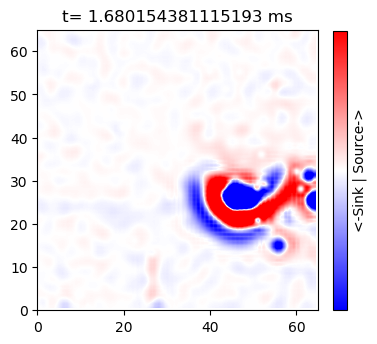

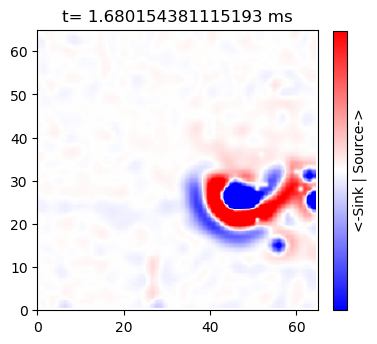

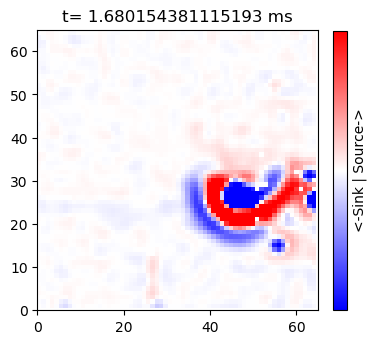

In [65]:
t=120
#ion()
ioff()
lista=("sinc", "hanning", "nearest")
limites=20
for interpol in lista
figure(figsize=(4,4))
    xlim(0,65)
    ylim(0,65)

    ejemplo=CSD[:,:,t]
    tiempo=round(t-retrazo)/freq

tick_params(
    axis="both",          # changes apply to the x-axis
    which="both",      # both major and minor ticks are affected
   # bottom="off",      # ticks along the bottom edge are off
    top="off",
    right="off",
   # left="off",
# ticks along the top edge are off
   # labelbottom="off",
    labelleft="on")

    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation=interpol,
    cmap="bwr", 
                      vmin=-limites,vmax=limites, extent=[0,64.5,0.5,64.5])

cbx=colorbar(imagen, fraction=0.045, ticks=[]) 

cbx[:set_label]("<-Sink | Source->")
end

In [66]:
inicio=1
final=250
paso=7
tmax

1163

In [67]:
limites

20

In [68]:

ioff()


for t=inicio:paso:final
#t=1000
    figura=figure(figsize=(4,4))
    xlim(0,65)
    ylim(0,65)

    ejemplo=CSD[:,:,t]
    tiempo=@sprintf("%3.1f",(t-retrazo)/freq);
    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation="nearest",
                  cmap="coolwarm", 
                  vmin=-limites,vmax=limites, extent=[0.5,64.5,0.5,64.5,])

   cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
   cbx[:set_label]("<-Sink | Source->")
    savefig("CSD_nearest_bicv_9_$t.png",dpi=90)
   close(figura)
end
PyPlot.close_figs()


In [69]:

Centros=load(archivocm)
CMPos=Centros["CMP"];
CMNeg=Centros["CMN"];


In [70]:
corte(x,ϵ)=x> ϵ ? x : 0

corte (generic function with 1 method)

In [71]:
extrema(CSD[:,:,t])

(-10.129360147594525, 3.0888418951507495)

In [72]:
ejemplopos=map(x->corte(x, 2.7), CSD[:,:,120]);

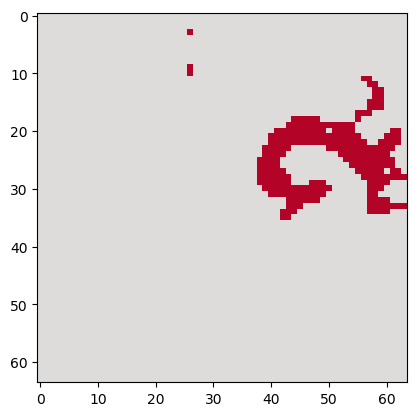

PyObject <matplotlib.image.AxesImage object at 0x7fd696fb9898>

In [73]:
imshow(ejemplopos, cmap="coolwarm", vmin=-1,vmax=1)

In [74]:
t=120
ejemploneg=-map(x->corte(-x, 2.7), CSD[:,:,t]);


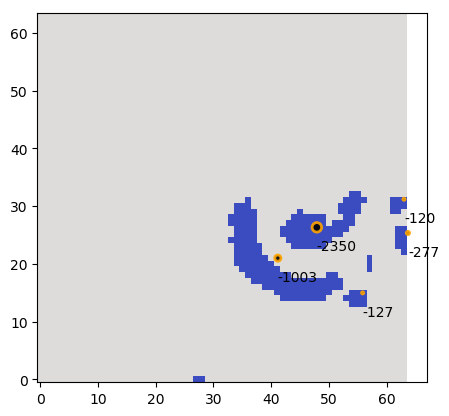

In [75]:
imshow(ejemploneg, cmap="coolwarm", vmin=-1,vmax=1, origin="lower")
xxneg=CMNeg[t][:,1]
yyneg=CMNeg[t][:,2]
valorneg=CMNeg[t][:,3]
scatter(xxneg, yyneg,s=0.02*abs.(valorneg), alpha=0.9, c="black", edgecolors="orange", lw=2)

for j in 1:size(valorneg,1)
    annotate(round(Int,valorneg[j]),xy=(xxneg[j],yyneg[j]-4))
end

In [76]:

#t=120
# ion()
ioff()
for t=inicio:paso:final

    ejemploneg=-map(x->corte(-x, 2.7), CSD[:,:,t]);
    ejemplopos=map(x->corte(x, 2.7), CSD[:,:,t]);


    farofa, lista=subplots(1,2, figsize=(8.5,4))

     tiempo=@sprintf("%3.1f",(t-retrazo)/freq);
        suptitle("t= $tiempo ms", fontsize=14)

    
    lista[1][:set_xlim](0,65)
    lista[1][:set_ylim](0,65)
    
    
    lista[1][:imshow](ejemploneg, cmap="coolwarm", vmin=-1,vmax=1, origin="lower", extent=[0.5,64.5, 0.5,64.5])
    
    
    
    xxneg=CMNeg[t][:,1]
    yyneg=CMNeg[t][:,2]
    valorneg=CMNeg[t][:,3]
    lista[1][:scatter](xxneg, yyneg,s=0.02*abs.(valorneg), alpha=0.9, c="black", edgecolors="orange", lw=2)
    lista[1][:set_title]("Negative Components (Sinks)")

    for j in 1:size(valorneg,1)
        lista[1][:annotate](round(Int,valorneg[j]),xy=(xxneg[j],yyneg[j]-4))
    end


    
    lista[2][:set_xlim](0,65)
    lista[2][:set_ylim](0,65)
    

    lista[2][:imshow](ejemplopos, cmap="coolwarm", vmin=-1,vmax=1, origin="lower", extent=[0.5,64.5, 0.5,64.5])
    xxpos=CMPos[t][:,1]
    yypos=CMPos[t][:,2]
    valorpos=CMPos[t][:,3]
    lista[2][:scatter](xxpos, yypos,s=0.02*abs.(valorpos), alpha=0.9, c="black", edgecolors="orange", lw=2)
    lista[2][:set_title]("Positive Components (Sources)")

    for j in 1:size(valorpos,1)
        lista[2][:annotate](round(Int,valorpos[j]),xy=(xxpos[j],yypos[j]-4))
    end
    
     savefig("DisjointComponents_Evento_control-9-$t.png", dpi=90)
     close()
end

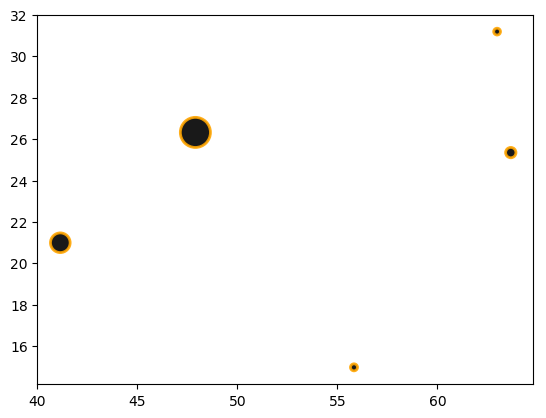

PyObject <matplotlib.collections.PathCollection object at 0x7fd694545160>

In [77]:
xxneg=CMNeg[120][:,1]
yyneg=CMNeg[120][:,2]
valorneg=CMNeg[120][:,3]
scatter(xxneg, yyneg,s=0.2*abs.(valorneg), alpha=0.9, c="black", edgecolors="orange", lw=2)

In [85]:
CMNeg[120]

8×3 Array{Float64,2}:
 10.0071   1.35652    -31.1105
 44.3482  18.867     -772.427 
 63.1805  23.7225     -36.041 
 15.9889   1.21129    -13.6418
 48.2698  26.1574   -2011.12  
 55.7779  51.7767     -26.5123
 62.2513  35.328     -267.539 
 39.5762  31.1466     -36.3515

El epsilon para los componentes disjuntos fue de 2.7

In [51]:

#No esta funcionando esto!
font1 = ["family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>20]

ion()
t=100

ioff()
for t=inicio:paso:final

    EjemploCentrosCSDPos=CMPos[t]
    xxpos=EjemploCentrosCSDPos[:,1]
    yypos=EjemploCentrosCSDPos[:,2]
    valorpos=EjemploCentrosCSDPos[:,3]

    EjemploCentrosCSDNeg=CMNeg[t]
    xxneg=EjemploCentrosCSDNeg[:,1]
    yyneg=EjemploCentrosCSDNeg[:,2]
    valorneg=EjemploCentrosCSDNeg[:,3];
    CSDEjemplo=CSD[:,:,t];


#################

    tiempo=@sprintf("%3.1f",(t-retrazo)/freq);
    titulo=tiempo *"ms"

    limites=20
    figura=figure()
    xlim(0,64)
    ylim(0,64)
    #tick_params(labelbottom="off", labelleft="off")
    otraimagen=imshow(CSDEjemplo, origin="lower", interpolation="nearest",
                          cmap="coolwarm", 
                      vmin=-limites,vmax=limites,extent=[0.5, 64.5, 0.5, 64.5] )

    #cb=colorbar(otraimagen)
    #cb=colorbar(otraimagen, ticks=[-150, +150],fraction=0.046, pad=0.04, use_gridspace='True')
    cb=colorbar(otraimagen, ticks=[-limites, +limites], use_gridspec="True")
    farofa=cb[:set_ticklabels](["Sink", "Source"])
    #xlabel("furufu", fontdict=font1)

    scatter(xxpos,yypos, s=valorpos, alpha=0.4, c="r", edgecolors="none")
    scatter(xxneg, yyneg, s=abs.(valorneg), alpha=0.4, c="g", edgecolors="none")
    scatter(xxpos,yypos, s=0.02*valorpos, alpha=0.9, c="r", edgecolors="none")
    scatter(xxneg, yyneg,s=0.02*abs.(valorneg), alpha=0.9, c="b", edgecolors="none")

    title(titulo)
    savefig("CSDCM_Evento_control-5-$t.png", dpi=90)
     close(figura)
end

In [52]:
Componentes91=CMP[100]

LoadError: [91mUndefVarError: CMP not defined[39m

In [69]:
CMPos[1001]

38×3 Array{Float64,2}:
 41.908    11.2425     11.792  
  1.98645   4.3046     13.3423 
  6.63513  64.0        28.1351 
 47.051    15.4234     17.0577 
 48.753     3.11941    21.7826 
  4.49069  14.9224    154.723  
 59.1561   17.0049     48.5424 
  5.05445  58.5241    105.762  
 49.1744   61.9372     96.6836 
 63.2281   40.7696     24.2707 
  1.58726  62.9482      9.64032
 21.1235   10.4103   1493.05   
 16.5328   48.3404   6900.94   
  ⋮                            
 59.2477   61.9934     37.4797 
 61.8352    4.02664    39.9385 
 25.2575   62.3108    307.368  
 47.3826    6.23671   329.508  
 11.2146    7.1942     30.8422 
 55.7256   12.9181    171.27   
  4.74193   7.5355     71.9402 
 24.5949   38.8969   5073.75   
  3.12361  55.3012     24.7974 
 20.4863   30.2891     13.9495 
 62.682    49.5434     10.9812 
 62.6066   31.5885     31.7242 

In [13]:
bchica=readdlm("../kCSD/BceroDura-r-0.0675.dat")
btchica=readdlm("../kCSD/BtildeceroDura-r-0.0675.dat");

LoadError: SystemError: opening file ../kCSD/BceroDura-r-0.0675.dat: No existe el fichero o el directorio

In [17]:
aver=imshow(bchica,interpolation="nearest", cmap="gnuplot")
cbx=colorbar(aver)

LoadError: UndefVarError: bchica not defined

In [18]:
bgrande=readdlm("../kCSD/BceroDura-r-0.25.dat")
btgrande=readdlm("../kCSD/BtildeceroDura-r-0.25.dat");

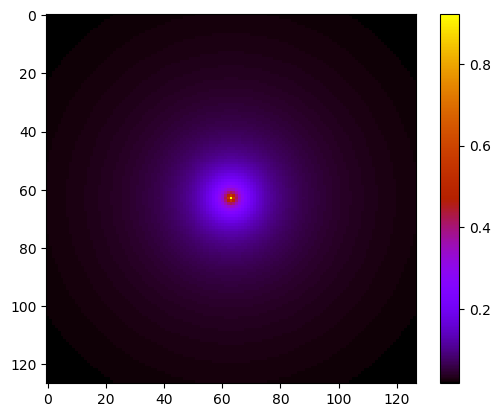

PyObject <matplotlib.colorbar.Colorbar object at 0x7f83bc2baeb8>

In [19]:
aver=imshow(bgrande,interpolation="nearest", cmap="gnuplot")
cbx=colorbar(aver)

In [20]:
size(bgrande)
tu=vec(bgrande[64,:])
te=vec(bchica[64,:])

LoadError: UndefVarError: bchica not defined

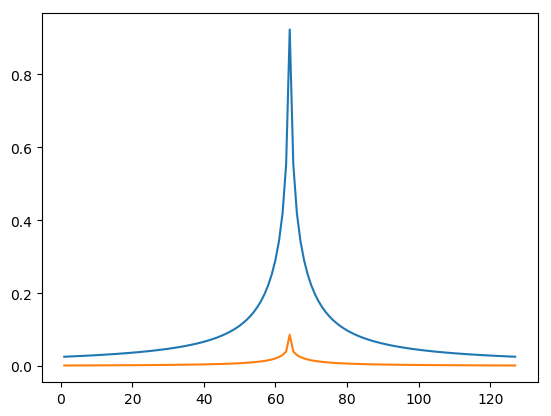

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f07a8c53c50>

In [24]:
plot(1:127,tu)
plot(1:127,te)

In [25]:
bgmin=bgrande/minimum(bgrande)

127x127 Array{Float64,2}:
 1.0      1.00794  1.01595  1.02401  …  1.02401  1.01595  1.00794  1.0    
 1.00794  1.01608  1.02428  1.03255     1.03255  1.02428  1.01608  1.00794
 1.01595  1.02428  1.03269  1.04116     1.04116  1.03269  1.02428  1.01595
 1.02401  1.03255  1.04116  1.04984     1.04984  1.04116  1.03255  1.02401
 1.03213  1.04088  1.0497   1.0586      1.0586   1.0497   1.04088  1.03213
 1.04031  1.04926  1.0583   1.06743  …  1.06743  1.0583   1.04926  1.04031
 1.04854  1.05771  1.06697  1.07632     1.07632  1.06697  1.05771  1.04854
 1.05682  1.06621  1.0757   1.08528     1.08528  1.0757   1.06621  1.05682
 1.06514  1.07476  1.08448  1.0943      1.0943   1.08448  1.07476  1.06514
 1.07351  1.08336  1.09332  1.10339     1.10339  1.09332  1.08336  1.07351
 1.08193  1.09201  1.10221  1.11253  …  1.11253  1.10221  1.09201  1.08193
 1.09037  1.1007   1.11115  1.12172     1.12172  1.11115  1.1007   1.09037
 1.09886  1.10943  1.12013  1.13096     1.13096  1.12013  1.10943  1.09886

In [26]:
cloack=bgmin-brmin

LoadError: UndefVarError: brmin not defined

In [27]:
imshow(cloack,cmap="gnuplot",interpolation="none")
colorbar()

LoadError: UndefVarError: cloack not defined

In [28]:
xlim(0,65)
ylim(0,65)
imshow(KOp,cmap="gnuplot", vmin=-1,vmax=1)
colorbar()

LoadError: UndefVarError: KOp not defined

In [29]:
KOp[1:64,1:64]

LoadError: UndefVarError: KOp not defined

# Pruebas de Estabilidad en una submatrix pequeñita

In [14]:
Kdd=readdlm("../kCSD/Krevisarestable.dat")
Ktildedd=readdlm("../kCSD/KTilderevisarestable.dat");

In [15]:
size(Kdd)

(575,575)

In [16]:
sublfp=LFP[41:64,11:34,1000]
saturados=Set{Array{Int,1}}()
push!(saturados, [1,1])

Set(Array{Int64,1}[[1,1]])

In [19]:
writedlm("EjemplitoLFP.dat",sublfp)

In [17]:
saturados

Set(Array{Int64,1}[[1,1]])

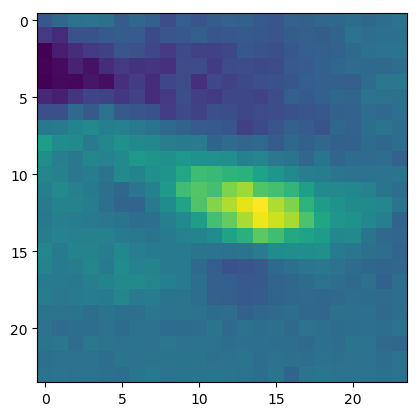

PyObject <matplotlib.image.AxesImage object at 0x7f6f5ec07be0>

In [18]:
imshow(sublfp)

In [20]:
include("../CSDA/LindenbergOperadores.jl")
importall LindenbergOperadores

In [21]:
aux1=GaussianSmooth(sublfp);
aux2=DiscreteLaplacian(aux1);
dcsd=-aux2;

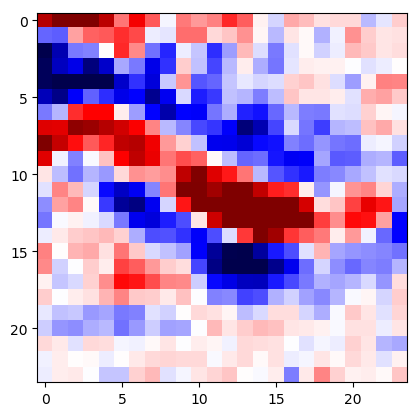

PyObject <matplotlib.image.AxesImage object at 0x7f6f5f03d128>

In [24]:
writedlm("EjemplitodCSD.dat",dcsd)
vlim=100
imshow(dcsd,cmap="seismic",vmin=-vlim,vmax=vlim)

In [25]:
todaslasX=Array[]

ncuad=24
Ntot=ncuad^2

for j=1:ncuad,k=1:ncuad
    push!(todaslasX,[j,k])
end

xpurgadas=filter(q->!(q in saturados), todaslasX)
nbuenas=length(xpurgadas)

CSDtentativa=zeros(Ntot)
CSD=zeros(sublfp)

lfpv=zeros(nbuenas)

println("Acomodando los LFP correctos")

for j=1:nbuenas
    renglon=xpurgadas[j][1]
    columna=xpurgadas[j][2]
    lfpv[j]=sublfp[renglon,columna]
end


Acomodando los LFP correctos


In [26]:
rangolambda=20


CSD=zeros(Float64,ncuad,ncuad,rangolambda)
CSDTentativa=zeros(nbuenas,rangolambda)

#nbuenas es la long de la diagonal!!!
## y de cualquier lado de la matriz, daah..
KLambda=deepcopy(Kdd)
KTT=zeros(Kdd)

intervalo=0.2


for l=1:rangolambda
     KLambda=deepcopy(Kdd)
    lambda=l/(rangolambda)
    println(lambda, " ",KLambda[8,8])
    for j=1:nbuenas
       
        KLambda[j,j]=KLambda[j,j]/2.0*(1.0+intervalo*lambda)
    
        KTT=transpose(Ktildedd)*inv(KLambda)
    end
    println(lambda, ",", KTT[8,8], " ", KLambda[8,8])
    CSDTentativa[:,l]=KTT*lfpv 
    
end


for j=1:nbuenas
    renglon=xpurgadas[j][1]
    columna=xpurgadas[j][2]
    CSD[renglon,columna,:]=CSDTentativa[j,:]
end


println("terminando calculo")
writedlm("EjemplitokCSD.dat",CSD)

0.05 110.126614487913
0.05,-0.280373586855922 55.61394031639607
0.1 110.126614487913
0.1,-0.15116678901292757 56.164573388835635
0.15 110.126614487913
0.15,-0.0995751268833115 56.715206461275194
0.2 110.126614487913
0.2,-0.07224736757423307 57.26583953371476
0.25 110.126614487913
0.25,-0.055523760594174125 57.81647260615433
0.3 110.126614487913
0.3,-0.04433716108480264 58.367105678593894
0.35 110.126614487913
0.35,-0.03638624526605372 58.91773875103346
0.4 110.126614487913
0.4,-0.030480028014548844 59.46837182347303
0.45 110.126614487913
0.45,-0.02594268183182516 60.01900489591259
0.5 110.126614487913
0.5,-0.022363406330912463 60.569637968352154
0.55 110.126614487913
0.55,-0.019478789299167076 61.12027104079172
0.6 110.126614487913
0.6,-0.017112540770962754 61.67090411323129
0.65 110.126614487913
0.65,-0.015142465241273712 62.22153718567084
0.7 110.126614487913
0.7,-0.013481344166215988 62.77217025811041
0.75 110.126614487913
0.75,-0.012065357469442638 63.322803330549974
0.8 110.126614

In [42]:
intervalo=(1,1.2)
save("EjemploskCSD.jld", "CSD", CSD)

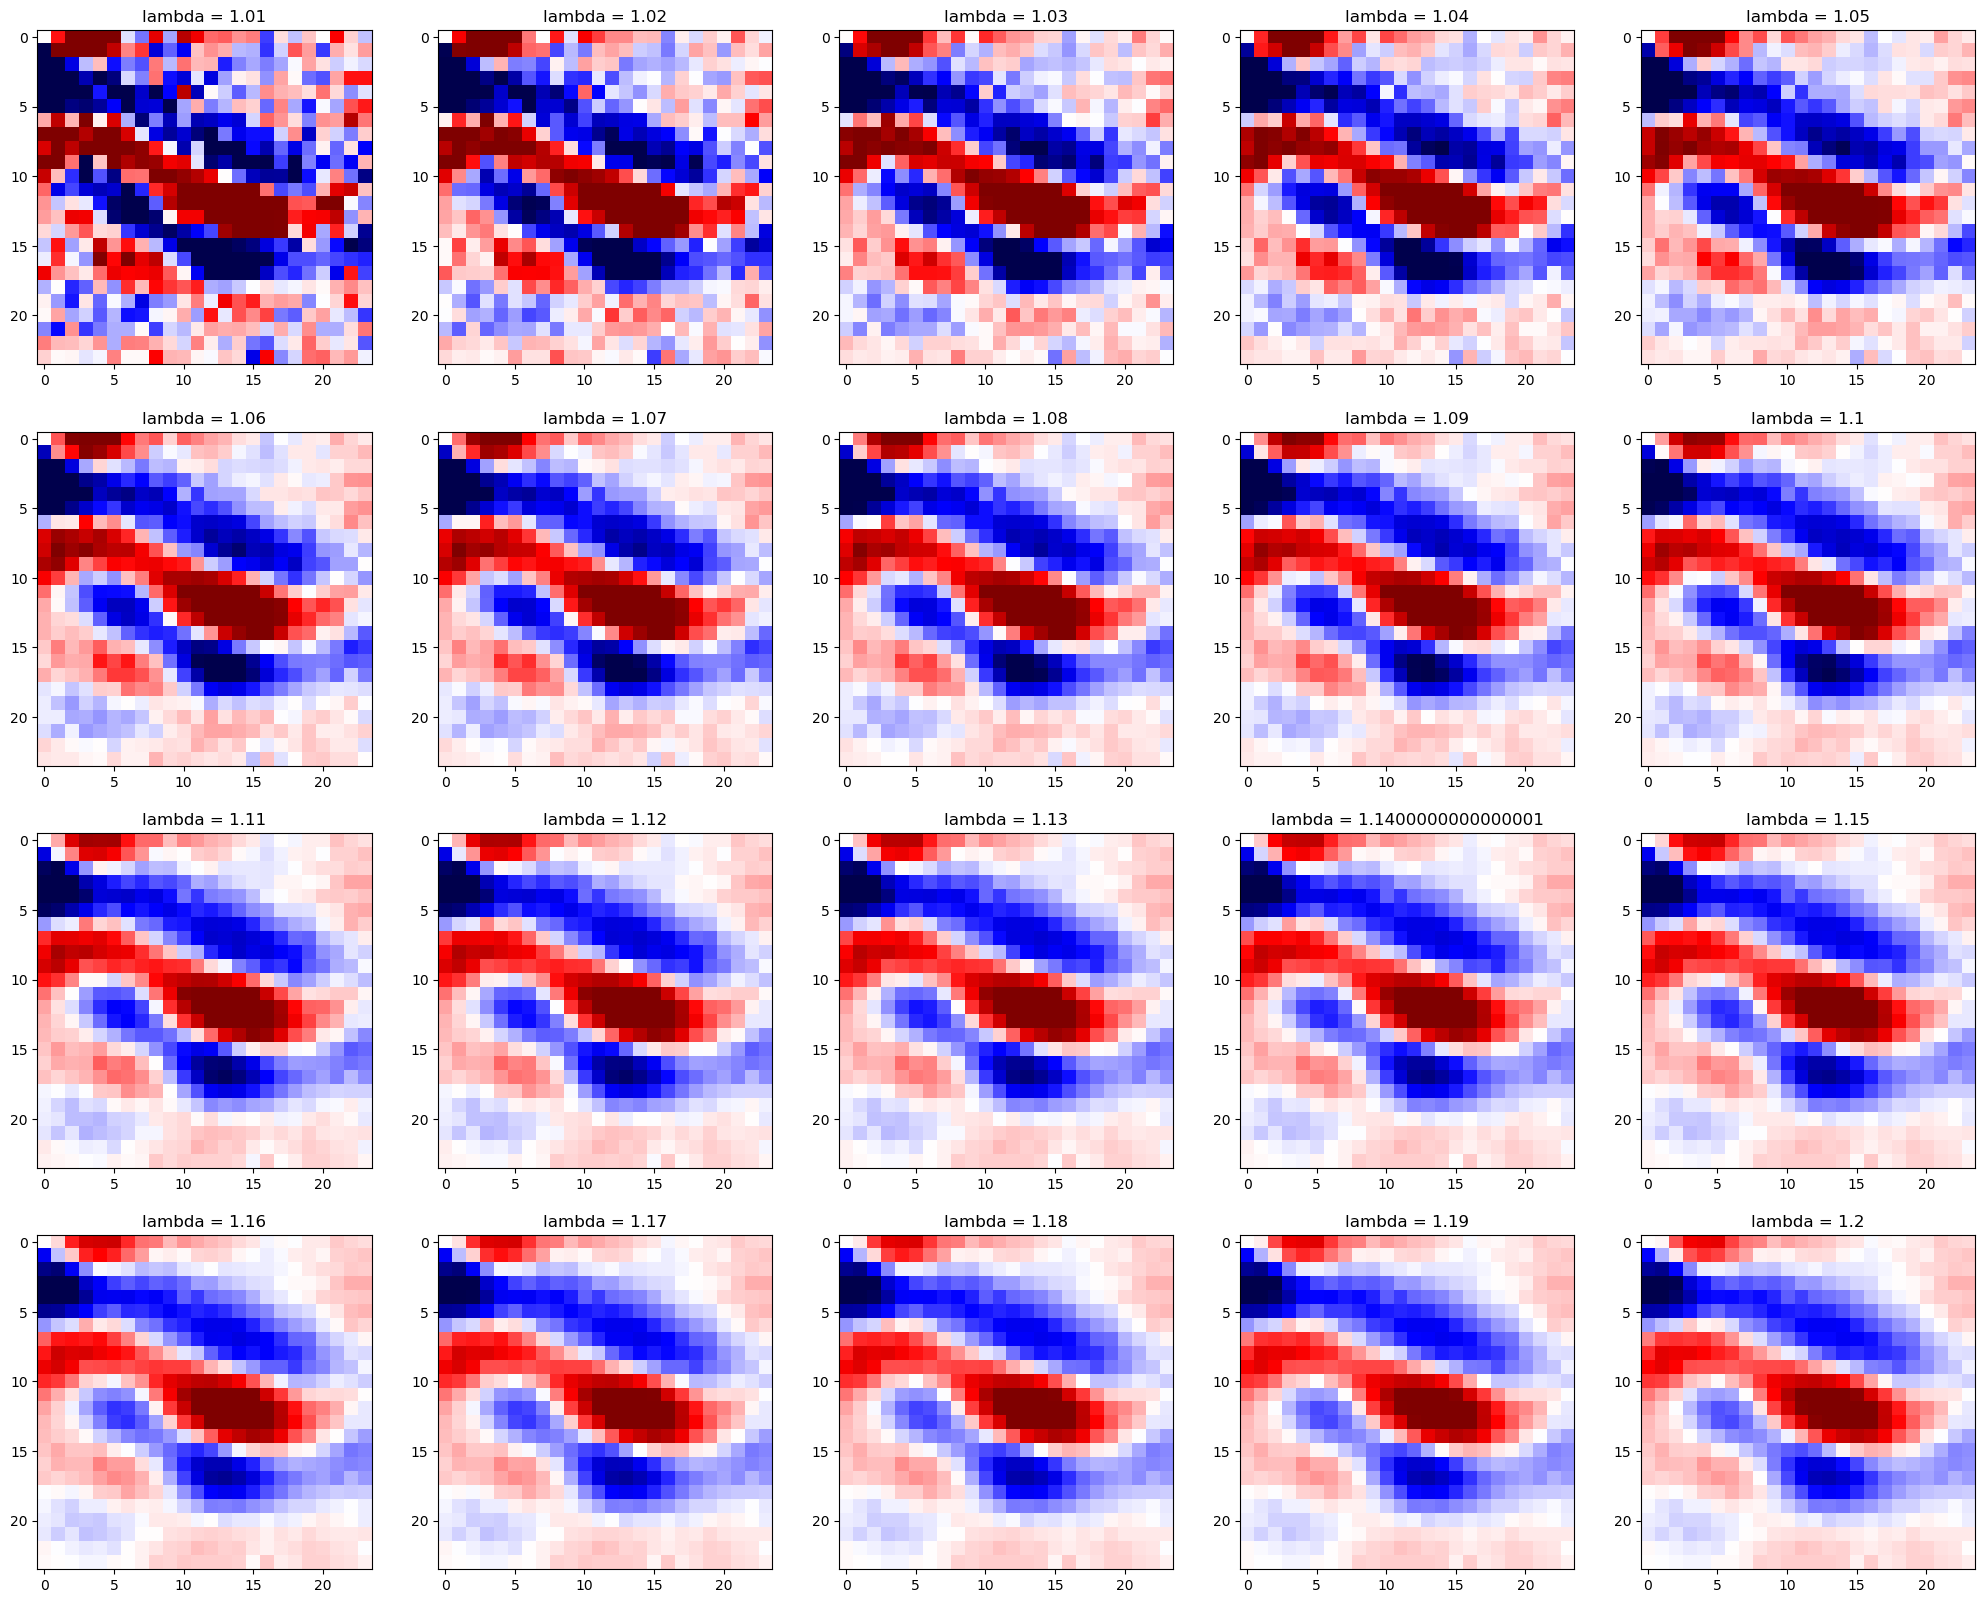

In [33]:
farofa, lista=subplots(4,5, figsize=(25,20))
vlim=40
intervalo=0.2
for j=1:rangolambda
    pu=ceil(Int,j/5)
    pa=mod(j,5)
    reallambda=(1+intervalo*j/rangolambda)
    if pa==0; pa=5;end
   # println(pa,", ",pu)
    lista[pu,pa][:imshow](CSD[:,:,j],cmap="seismic",vmin=-vlim,vmax=vlim)
    lista[pu,pa][:set_title]("lambda = $reallambda")
end
savefig("VarioskCSD03.png",dpi=92)

In [113]:
for j=1:rangolambda
    pu=ceil(Int,j/5)
    pa=mod(j,5)
    if pa==0; pa=5 ; end
    println(pu," ",pa)
end

1 1
1 2
1 3
1 4
1 5
2 1
2 2
2 3
2 4
2 5
3 1
3 2
3 3
3 4
3 5
4 1
4 2
4 3
4 4
4 5
